In [1]:
import pickle
import pandas as pd
import seaborn as sns

In [2]:
preReg = pickle.load(open("./preReg.p", "rb"))

elastix32 = pickle.load(open("./elastixResults32oldT3.p", "rb"))
elastix64 = pickle.load(open("./elastixResults64oldT3.p", "rb"))
elastix32NewT3 = pickle.load(open("./elastixResults32newT3.p", "rb")) 
elastix64NewT3 = pickle.load(open("./elastixResults64newT3.p", "rb"))

voxelmorph = pickle.load(open("./voxelmorphOldT3.p", "rb"))
voxelmorphNewT3 = pickle.load(open("./voxelmorphNewT3.p", "rb"))

elastixRes = {'Elastix 32 mm Grid': elastix32, 'Elastix 64 mm Grid': elastix64, 'Elastix 32 mm Grid new T3': elastix32NewT3, 'Elastix 64 mm Grid new T3': elastix64NewT3}
voxelmophRes = {'Voxelmorph': voxelmorph, 'Voxelmorph new T3': voxelmorphNewT3}
elastixResDf, voxelmophResDf = pd.DataFrame(), pd.DataFrame()

voxelmophResDf['Pre Registration'] = elastixResDf['Pre Registration'] = preReg.values()
for i in range(len(elastixRes)): elastixResDf[list(elastixRes.keys())[i]] = list(elastixRes.values())[i].values()
for i in range(len(voxelmophRes)): voxelmophResDf[list(voxelmophRes.keys())[i]] = list(voxelmophRes.values())[i].values()

In [3]:
def showPlot(data, figsize):
    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize': figsize})
    ax = sns.boxplot(data = data * 1.8, orient='h', width = 0.7)
    ax.set_xlim(4,20)
    ax.set_xticks([x for x in range(4,20)])
    ax.set_xticklabels([x if x % 2 == 0 else ""  for x in range(4,20)])
    ax.set_xlabel('Distance in mm')

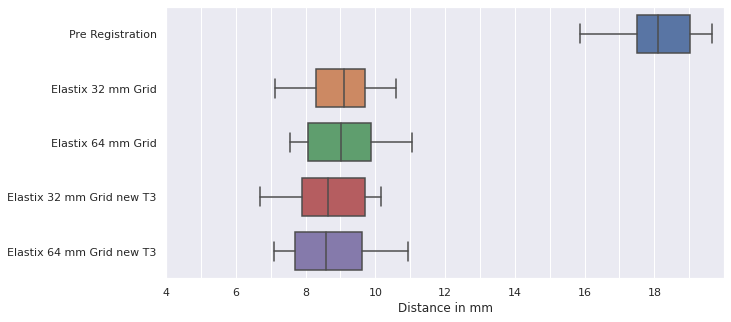

In [4]:
showPlot(elastixResDf, (10, 5))

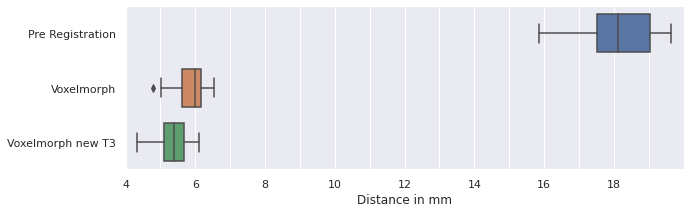

In [5]:
showPlot(voxelmophResDf, (10, 3))

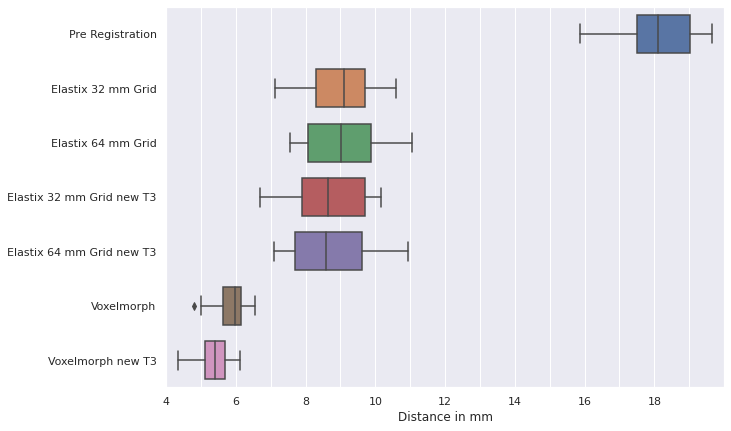

In [6]:
showPlot(pd.concat([elastixResDf, voxelmophResDf]), (10,7))